## Statistical Analysis

In [3]:
# import necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv(r"C:\Users\r8833\Desktop\cleaned_data.csv")
df.head()

,Customer_ID,Name,Age,Gender,Location,Purchase_Amount,Purchase_Date,Loyalty_Points,Website_Visits,Product_Category_Beauty,Product_Category_Electronics,Product_Category_Fashion,Product_Category_Home,Product_Category_Toys,Preferred_Payment_Method_Cash,Preferred_Payment_Method_Credit Card,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_Net Banking,Preferred_Payment_Method_UPI,High_Value
0,CUST1000,Customer_0,64,Male,North,301.40,2024-12-01,271,39,False,False,False,False,True,False,False,True,False,False,1
1,CUST1001,Customer_1,37,Male,East,150.69,2024-12-24,503,10,False,True,False,False,False,False,False,False,True,False,1
2,CUST1002,Customer_2,27,Male,East,449.15,2024-09-13,482,42,False,False,True,False,False,False,False,False,False,True,1
3,CUST1003,Customer_3,36,Male,East,356.97,2024-01-02,412,49,True,False,False,False,False,True,False,False,False,False,1
4,CUST1004,Customer_4,59,Female,East,257.52,2024-08-30,136,40,False,False,False,False,True,False,False,True,False,False,1


In [68]:
# Convert Purchase_Date to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

In [69]:
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')

In [70]:
# Replace NaN with 0, or remove the rows with NaN
df['Purchase_Amount'].fillna(0, inplace=True)  # Replace with 0
# OR
df.dropna(subset=['Purchase_Amount'], inplace=True)  # Remove rows

In [71]:
df.to_csv('cleaned_data.csv', index=False) 

In [72]:
df.head()

,Customer_ID,Name,Age,Gender,Location,Purchase_Amount,Purchase_Date,Loyalty_Points,Website_Visits,Product_Category_Beauty,Product_Category_Electronics,Product_Category_Fashion,Product_Category_Home,Product_Category_Toys,Preferred_Payment_Method_Cash,Preferred_Payment_Method_Credit Card,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_Net Banking,Preferred_Payment_Method_UPI,High_Value
0,CUST1000,Customer_0,64,Male,North,301.40,2024-12-01,271,39,False,False,False,False,True,False,False,True,False,False,1
1,CUST1001,Customer_1,37,Male,East,150.69,2024-12-24,503,10,False,True,False,False,False,False,False,False,True,False,1
2,CUST1002,Customer_2,27,Male,East,449.15,2024-09-13,482,42,False,False,True,False,False,False,False,False,False,True,1
3,CUST1003,Customer_3,36,Male,East,356.97,2024-01-02,412,49,True,False,False,False,False,True,False,False,False,False,1
4,CUST1004,Customer_4,59,Female,East,257.52,2024-08-30,136,40,False,False,False,False,True,False,False,True,False,False,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Customer_ID                           5000 non-null   object        
 1   Name                                  5000 non-null   object        
 2   Age                                   5000 non-null   int64         
 3   Gender                                5000 non-null   object        
 4   Location                              5000 non-null   object        
 5   Purchase_Amount                       5000 non-null   float64       
 6   Purchase_Date                         5000 non-null   datetime64[ns]
 7   Loyalty_Points                        5000 non-null   int64         
 8   Website_Visits                        5000 non-null   int64         
 9   Product_Category_Beauty               5000 non-null   bool          
 10  

In [74]:
# Select numerical columns for correlation
numerical_data = df.select_dtypes(include=[np.number])

In [75]:
# Compute correlation matrix
correlation_matrix = numerical_data.corr()

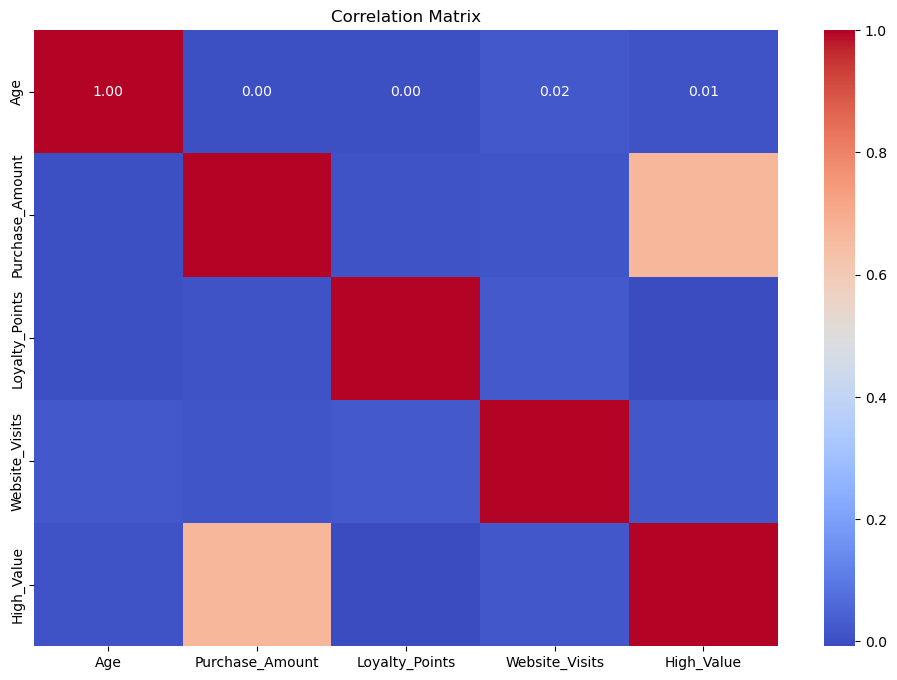

In [76]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [77]:
# 2. Trend Analysis
# Assuming there is a date or time-related column
# Convert the date column to datetime if applicable
if 'date' in df.columns:
    df['date'] = pd.to_datetime(data['date'])

## Predictive Analysis 

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the sales data
df = pd.read_csv(r"C:\Users\r8833\Desktop\cleaned_data.csv")

# Handle missing values
df.fillna(method='ffill', inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(data, columns=['Product_Category','Location'])

# Split the data into features and target variable
X = df.drop('Purchase_Amount', axis=1)  # Features
y = df['Purchase_Amount']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
df = pd.read_csv(r"C:\Users\r8833\Desktop\cleaned_data.csv")
df.head()

,Customer_ID,Name,Age,Gender,Location,Purchase_Amount,Purchase_Date,Loyalty_Points,Website_Visits,Product_Category_Beauty,Product_Category_Electronics,Product_Category_Fashion,Product_Category_Home,Product_Category_Toys,Preferred_Payment_Method_Cash,Preferred_Payment_Method_Credit Card,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_Net Banking,Preferred_Payment_Method_UPI,High_Value
0,CUST1000,Customer_0,64,Male,North,301.40,2024-12-01,271,39,False,False,False,False,True,False,False,True,False,False,1
1,CUST1001,Customer_1,37,Male,East,150.69,2024-12-24,503,10,False,True,False,False,False,False,False,False,True,False,1
2,CUST1002,Customer_2,27,Male,East,449.15,2024-09-13,482,42,False,False,True,False,False,False,False,False,False,True,1
3,CUST1003,Customer_3,36,Male,East,356.97,2024-01-02,412,49,True,False,False,False,False,True,False,False,False,False,1
4,CUST1004,Customer_4,59,Female,East,257.52,2024-08-30,136,40,False,False,False,False,True,False,False,True,False,False,1


In [80]:
# Create a new feature for high-value customers
df['High_Value'] = df['Purchase_Amount'].apply(lambda x: 1 if x > 100 else 0)  # Example threshold

# Split the data into features and target variable
X_class = df.drop(['Customer_ID', 'High_Value'], axis=1)  # Features
y_class = df['High_Value']  # Target variable

# Split into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
classifier = LogisticRegression()

# Fit the model
classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

ValueError: could not convert string to float: 'Customer_4227'